In [9]:
# numpy
import numpy as np

# pandas
import pandas as pd 

# seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from math import pi

In [2]:
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [3]:
data = pd.read_csv("pokemon_data/pokemon_data.csv")
data.head()

,Unnamed: 0,name,pokedex_number,status,type_number,type_1,type_2,height_m,weight_kg,total_points,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,이상해씨,1,노말,2,풀,독,0.7,6.9,318,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,이상해풀,2,노말,2,풀,독,1.0,13.0,405,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,이상해꽃,3,노말,2,풀,독,2.0,100.0,525,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,파이리,4,노말,1,불꽃,NaN,0.6,8.5,309,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,4,리자드,5,노말,1,불꽃,NaN,1.1,19.0,405,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [7]:
labels = data.columns[7:16]
num_labels = len(labels)
print(labels, num_labels)

Index(['height_m', 'weight_kg', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed'],
      dtype='object') 9


ValueError: num must be 1 <= num <= 6, not 7

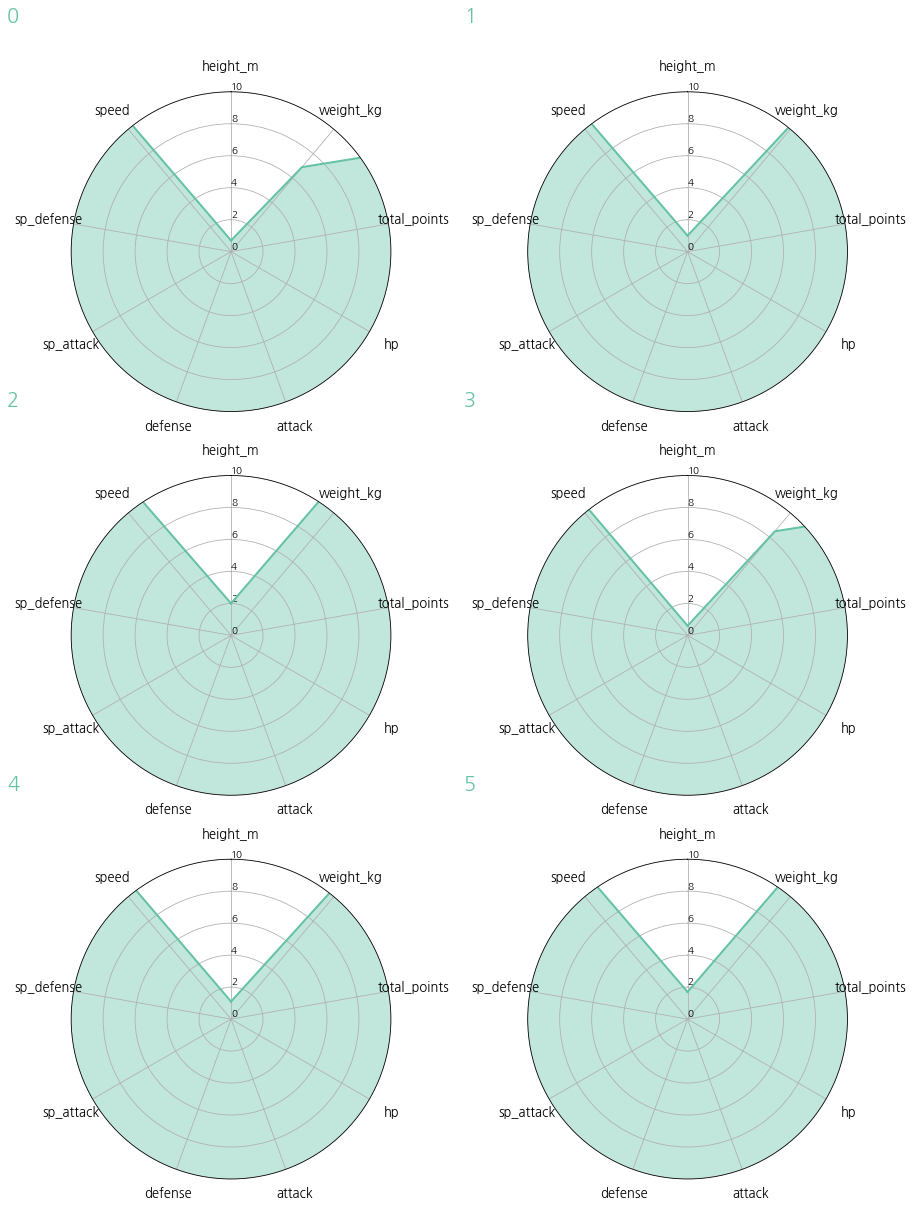

In [19]:
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가

my_palette = plt.cm.get_cmap("Set2", len(data.index))

fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')

for i, row in data.iterrows():
    color = my_palette(i)
    points = data.iloc[i,7:16].tolist()
    points += points[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,10)
    
    ax.plot(angles, points, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, points, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.name, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()